df_nona = df2.dropna()
df_nona.shape

df_nona.to_csv(data_location+'immo_noNa.csv', index=False)
df2.to_csv(data_location+'immo_data.csv', index=False)



In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from numpy import NaN
from operator import index


In [2]:
df = pd.read_csv('dataimmo_noNa.csv')
df_withNa = pd.read_csv('dataimmo_data.csv')
df_withNa = df_withNa[['price','area','garden_area','garden', 'number_of_rooms','terrace_area','terrace', 'surface_of_the_land', 'locality', 'type_of_property',
       'subtype_of_property', 'number_of_facades', 'type_of_sale', 'bid', 'zip_code',
       'state_of_the_building', 'open_fire', 'swimming_pool',
       'fully_equipped_kitchen',  'furnished', 'equipped_kitchen']]
df = df[['price','area','garden_area','garden', 'number_of_rooms','terrace_area','terrace', 'surface_of_the_land', 'locality', 'type_of_property',
       'subtype_of_property', 'number_of_facades', 'type_of_sale', 'bid', 'zip_code',
       'state_of_the_building', 'open_fire', 'swimming_pool',
       'fully_equipped_kitchen',  'furnished', 'equipped_kitchen']]
df_withNa.shape

(17373, 21)

/home/juliendesmedt/.local/lib/python3.8/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Number of empty row per columns')]

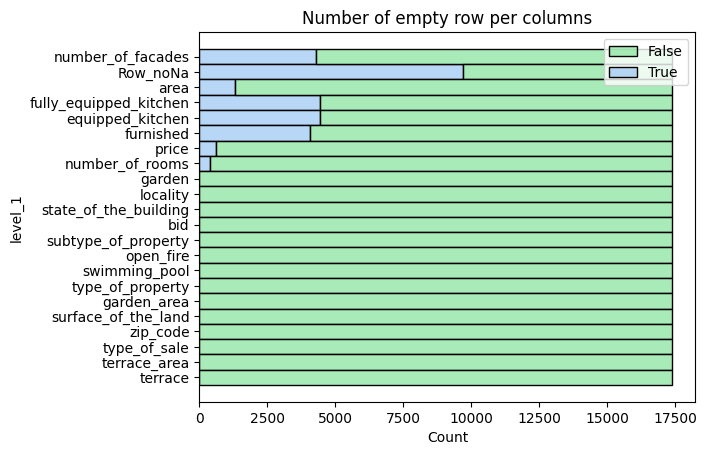

In [3]:
from turtle import title

df_withNa['row_has_Na'] = df_withNa.isna().any(axis=1)
df_withNa.loc[df_withNa['row_has_Na']==False, 'Row_noNa'] = '1'
df_withNa = df_withNa.drop('row_has_Na', axis=1)
#histo_Na = df_withNa.isna().stack().reset_index()[['level_1',0]].groupby('level_1').agg({0:'sum', 'level_1':'count'}).sort_values(0)
sns.set_palette("pastel")
NaN_columns = sns.histplot(df_withNa.isna().stack().reset_index().sort_values(0, ascending=False),y='level_1', hue=0, multiple="stack",palette=['C2', 'C0'])
NaN_columns.set(title='Number of empty row per columns')

In [ ]:
distrib_list =['price','area','garden_area','number_of_rooms','terrace_area','surface_of_the_land']
for x in distrib_list:
    lower_limit = np.percentile(df[x], 0.05)
    upper_limt = np.percentile(df[x], 99.5)
    df = df.drop(df[x][(df[x]<lower_limit)|(df[x]>upper_limt)].index)

In [ ]:
df['price'].shape

(7493,)

[Text(0.5, 1.0, 'Price distribution')]

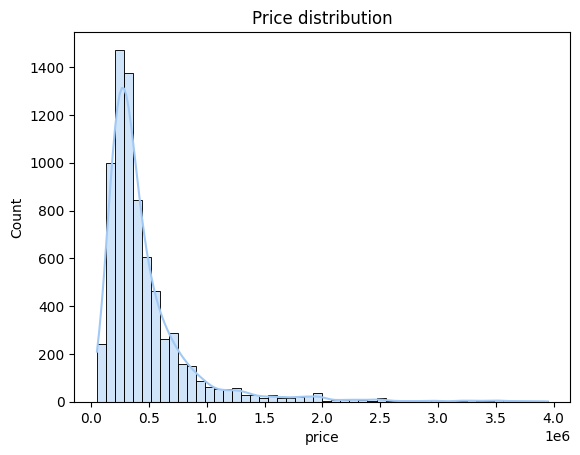

In [6]:
sns.histplot(df['price'], bins= 50, kde=True).set( title='Price distribution')

[Text(0.5, 1.0, 'area distribution')]

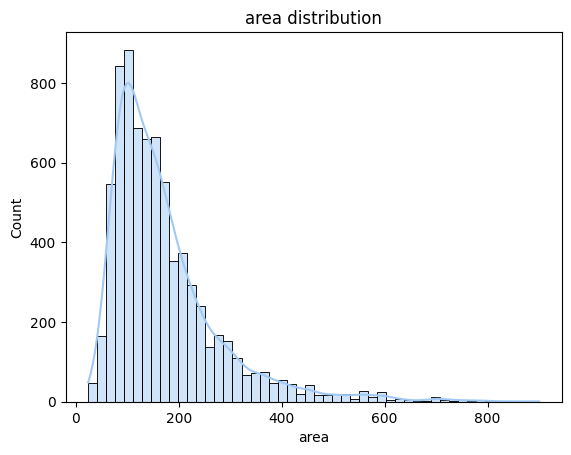

In [7]:
sns.histplot(df['area'], bins= 50, kde=True).set( title='area distribution')


[Text(0.5, 1.0, 'garden_area distribution')]

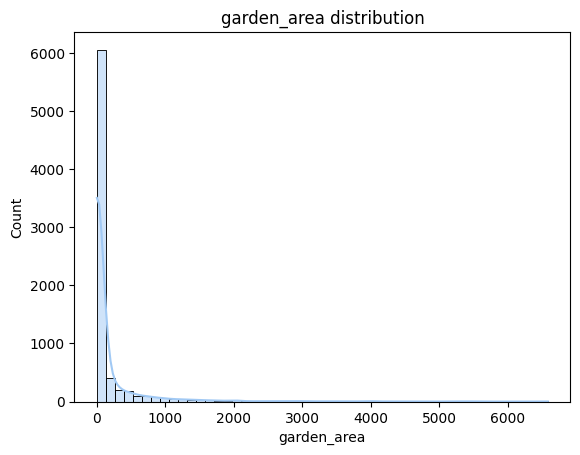

In [8]:

sns.histplot(df['garden_area'], bins= 50, kde=True).set( title='garden_area distribution')


[Text(0.5, 1.0, 'terrace_area distribution')]

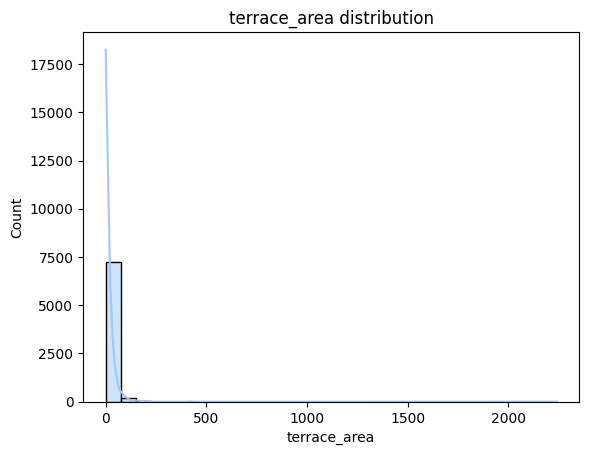

In [9]:
sns.histplot(df['terrace_area'], bins= 30, kde=True).set( title='terrace_area distribution')


Text(540000, 600, 'mean = 467061.0')

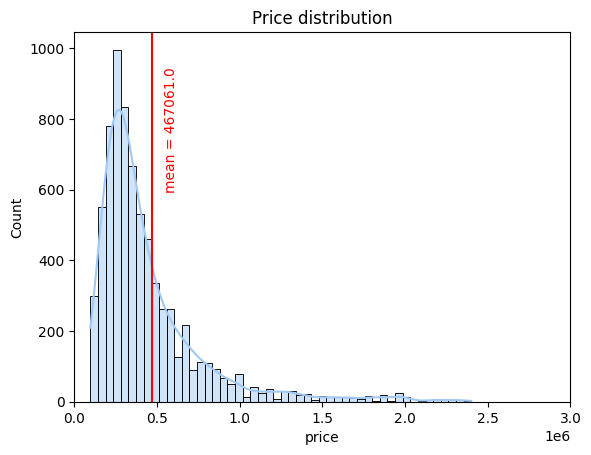

In [36]:
# Price graph
mean = df['price'].mean().round(0)
lower_limit = np.percentile(df['price'], 1)
upper_limt = np.percentile(df['price'], 99)
price_distrib =sns.histplot(df['price'].loc[(df['price']>lower_limit)&(df['price']<upper_limt)], bins= 50, kde=True)
price_distrib.set(xlim=(0,3000000), title='Price distribution')
plt.pyplot.axvline(x=df['price'].mean(),color='red')
plt.pyplot.text(540000,600,str('mean = '+ str(mean) ),rotation=90, color='red')


/tmp/ipykernel_19066/348950538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


[Text(0.5, 1.0, 'Variables_correlations')]

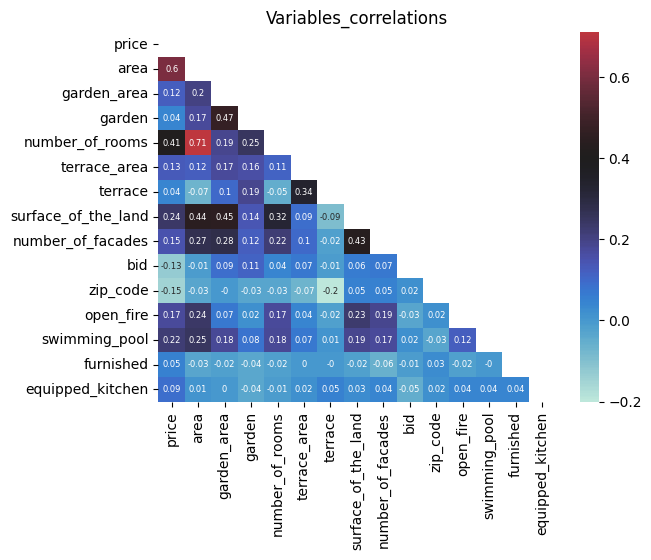

In [11]:
corr = df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_heatmapp = sns.heatmap(corr,annot=True,mask=mask ,center=0.4, annot_kws={"size":6})
corr_heatmapp.set(title='Variables_correlations' )

[Text(0.5, 1.0, 'Price correlations')]

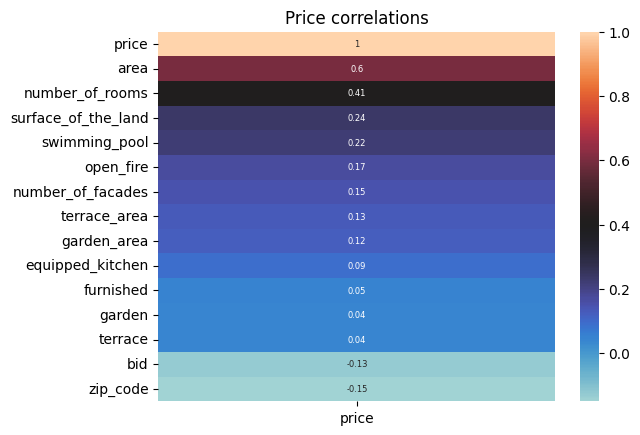

In [46]:

sns.heatmap(corr[['price']].sort_values('price',ascending=False ),annot=True ,center=0.4, annot_kws={"size":6}).set(title='Price correlations')

In [47]:
 #price corr 
df.corr().round(2).abs().iloc[[0]].stack().reset_index().sort_values(0, ascending=False).head(6)

/tmp/ipykernel_19066/451518105.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2).abs().iloc[[0]].stack().reset_index().sort_values(0, ascending=False).head(6)


,level_0,level_1,0
0,price,price,1.00
1,price,area,0.60
15,price,price_m2,0.58
4,price,number_of_rooms,0.41
7,price,surface_of_the_land,0.24
12,price,swimming_pool,0.22


In [13]:
# Analyse the price per area 'localisation' (see regarding the zip_code or find municipality  dictionary and see if match immmoweb data to then plot on graph)
df['price_m2'] = (df['price']/df['area']).astype('int')

<AxesSubplot: xlabel='price', ylabel='subtype_of_property'>

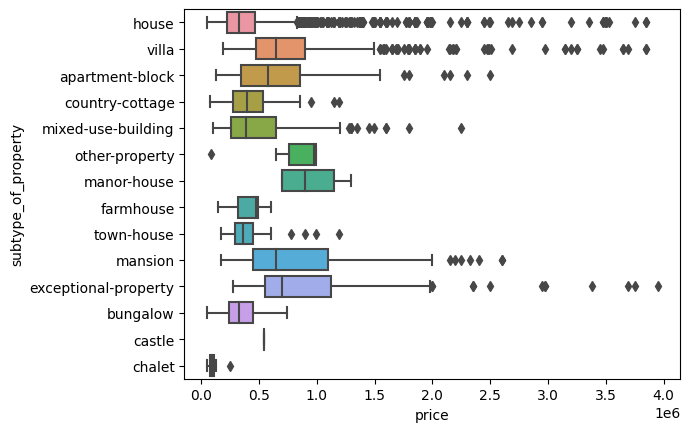

In [25]:
sns.boxplot(df[df['type_of_property']=='house'], y='subtype_of_property', x='price').set(title='distribution house subtypes')

<AxesSubplot: xlabel='price_m2', ylabel='price'>

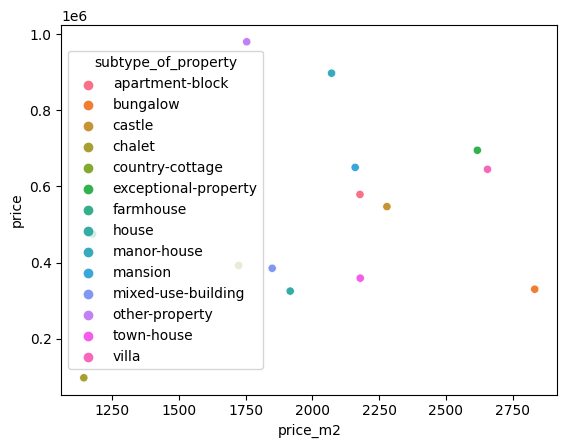

In [38]:
houses = df[df['type_of_property']=='house']

priceVSm2 = houses.groupby('subtype_of_property').agg({'price': 'median', 'price_m2': 'median'})
priceVSm2
sns.scatterplot(priceVSm2, x='price_m2', y='price', hue='subtype_of_property')

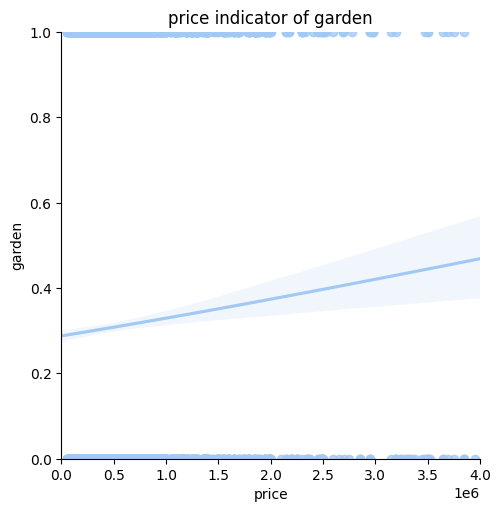

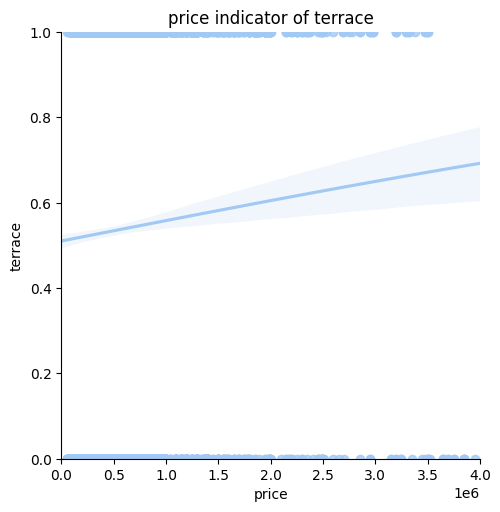

In [35]:
# make a distinction between houses en appartment

from email import header
from turtle import title


garden = sns.lmplot(x="price", y="garden", data=df,
                logistic=True, truncate=False)
                
terrace = sns.lmplot(x="price", y="terrace", data=df,
                logistic=True, truncate=False)



garden.set(ylim=(0, 1),xlim=(0, 4000000), title='price indicator of garden')
terrace.set(ylim=(0, 1), xlim=(0, 4000000),title='price indicator of terrace')


In [51]:
df['locality'].value_counts()

1180    257
1000    243
1050    209
8300    165
1030    129
       ... 
6997      1
3900      1
3806      1
3640      1
7603      1
Name: zip_code, Length: 740, dtype: int64

In [55]:
#zip extra info
data_location = '/home/juliendesmedt/Documents/becode/immo_web_project/immoweb_data_analysis/data'
column_names_zip = ['country_code','zip_code','municipality','region','region_code','province', 'province_code','arrondissement', 'nbr_mun', 'longitude', 'latitude','other']
zip_code = pd.read_csv(data_location+'/be_zipcode.txt', sep="\t", header=None , names=column_names_zip)
zip_code = zip_code[['zip_code','arrondissement','region_code', 'province_code']].drop_duplicates()
zip_code['zip_code'] = zip_code['zip_code']
zip_code[zip_code['zip_code']=='9988']

df_merge = df.merge(zip_code,how='left', on='zip_code' )

df_merge

,price,area,garden_area,garden,number_of_rooms,terrace_area,terrace,surface_of_the_land,locality,type_of_property,...,state_of_the_building,open_fire,swimming_pool,fully_equipped_kitchen,furnished,equipped_kitchen,price_m2,arrondissement,region_code,province_code
0,159000,122,171,1,2,20,1,335,ans,house,...,good,0,0,Semi equipped,0,1.0,1303,Liège,WAL,WLG
1,345000,119,0,0,4,0,0,49,gent,house,...,good,0,0,USA installed,0,1.0,2899,Gent,VLG,VOV
2,570000,404,1000,1,4,52,1,1000,galmaarden,house,...,as new,0,0,Hyper equipped,0,1.0,1410,Halle-Vilvoorde,VLG,VBR
3,800000,350,140,1,4,0,0,263,forest,house,...,to rebuild,0,0,Installed,0,1.0,2285,Arrondissement Brussel-Hoofdstad,BRU,BRU
4,425000,130,0,0,3,14,1,991,waimes,house,...,good,0,0,Semi equipped,0,1.0,3269,Verviers,WAL,WLG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,327000,84,0,0,2,6,1,0,blankenberge,apartment,...,not mentioned,0,0,Installed,0,1.0,3892,Brugge,VLG,VWV
7489,327250,90,0,0,2,9,1,0,blankenberge,apartment,...,not mentioned,0,0,Installed,0,1.0,3636,Brugge,VLG,VWV
7490,329500,84,0,0,2,6,1,0,blankenberge,apartment,...,not mentioned,0,0,Installed,0,1.0,3922,Brugge,VLG,VWV
7491,329500,80,0,0,2,18,1,0,blankenberge,apartment,...,not mentioned,0,0,Installed,0,1.0,4118,Brugge,VLG,VWV


In [ ]:
df_merge.groupby('locality')['price_m2'].mean().